## Title :
Exercise: Best Degree of Polynomial with Train and Validation sets

## Description :
The aim of this exercise is to find the **best degree** of polynomial based on the MSE values. Further, plot the train and validation error graphs as a function of degree of the polynomial as shown below.

<img src="img/best_degree.png" style="width: 500px;">

## Data Description:

## Instructions:

- Read the dataset and split into train and validation sets.
- Select a max degree value for the polynomial model.
- Fit a polynomial regression model on the training data for each degree and predict on the validation data.
- Compute the train and validation error as MSE values and store in separate lists.
- Find out the best degree of the model.
- Plot the train and validation errors for each degree.

## Hints: 

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">pd.read_csv(filename)</a>
Returns a pandas dataframe containing the data and labels from the file data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform" target="_blank">sklearn.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">sklearn.LinearRegression(fit_intercept=False)</a>
LinearRegression fits a linear model with no intercept calculation

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit" target="_blank">sklearn.fit()</a>
Fits the linear model to the training data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html" target="_blank">plt.subplots()</a>
Create a figure and a set of subplots

**Note:** This exercise is auto-graded and you can try multiple attempts.

In [2]:
# Import necessary libraries
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_22699/3879079163.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading the dataset

In [3]:
# Read the file "dataset.csv" as a Pandas dataframe
df = pd.read_csv("data/dataset.csv")

# Take a quick look at the dataset
df.head()


,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [4]:
# Assign the values of the x and y column values to the 
# predictor and response variables
x = df[['x']].values
y = df.y.values


### Train-validation split

In [5]:
### edTest(test_random) ###

# Split the dataset into train and validation sets with 75% training set
# Set random_state=1
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=1)


### Computing the train and validation error in terms of MSE

In [6]:
### edTest(test_regression) ###

# To iterate over the range, select the maximum degree of the polynomial
maxdeg = 10

# Create two empty lists to store training and validation MSEs
training_error, validation_error = [],[]

# Loop through the degrees of the polynomial to create different models
for d in range(maxdeg):

    # Compute the polynomial features for the current degree
    # for the train set
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)

    # Compute the polynomial features for the validation set
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)

    # Initialize a linear regression model
    lreg = LinearRegression(fit_intercept=False)

    # Fit the model on the train data
    lreg.fit(x_poly_train, y_train)

    # Use the trained model to predict on the transformed train data
    y_train_pred = lreg.predict(x_poly_train)

    # Use the trained model to predict on the transformed validation data
    y_val_pred = lreg.predict(x_poly_val)

    # Compute the MSE on the train predictions
    training_error.append(mean_squared_error(y_train, y_train_pred))

    # Compute the MSE on the validation predictions
    validation_error.append(mean_squared_error(y_val, y_val_pred))


### Finding the best degree

In [10]:
### edTest(test_best_degree) ###

# Helper code to compute the best degree, which is the model 
# with the lowest validation error
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)


The best degree of the model is 2


### Plotting the error graph

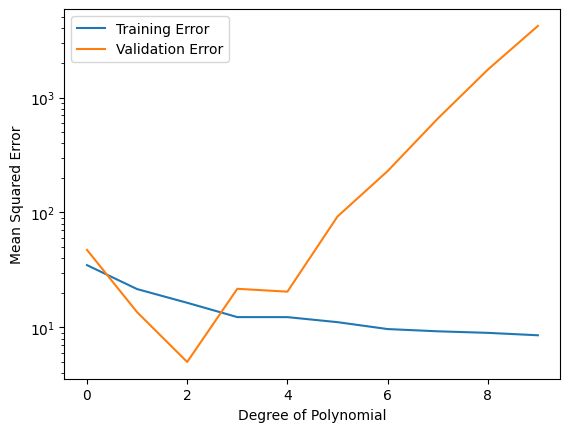

In [11]:
# Plot the errors as a function of increasing d value to visualise the training 
# and testing errors
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(np.arange(0, maxdeg), training_error, label="Training Error")

# Plot the validation error with labels
ax.plot(np.arange(0, maxdeg), validation_error, label="Validation Error")

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')
plt.show();


#### ⏸ If you run the exercise with a random state of 0, do you notice any change? What would you attribute this change to?

In [12]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
answer1 = 'No good, it change a lot'
